In [244]:
import sys
sys.path.insert(0, '../python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import imp
imp.reload(model)
import random
from collections import defaultdict
import torch
import math

In [245]:
%matplotlib inline

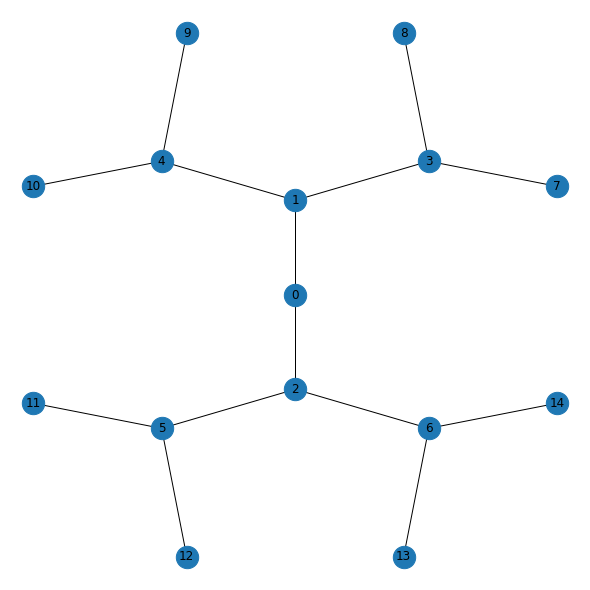

In [246]:
import imp 
imp.reload(graph_gen)
imp.reload(model)
Degree = 3 # degree
Height = 3 # Height of the tree
N, J_interaction = graph_gen.tree_interaction(Degree,Height, rand=False)
j = graph_gen.spin_glass()
J = graph_gen.set_J(J_interaction, j)
h = 0.001
H = np.full((N,), h)
tree = model.model(N, H, J, J_interaction)

In [247]:
import imp 
imp.reload(graph_gen)
imp.reload(model)

tree.exact(1)

beta: 1.0, Fe: -0.956 Energy: -0.424 M: 0.000994 S: 0.5333


-14.34636746588898

# BP

In [248]:
import bp_solver
imp.reload(bp_solver)
BP_tree = bp_solver.BP_solver(tree) 
BP_tree.converge(1)

fe: -0.956, ener: -0.424, M: 0.001, iter 5


# NN

In [274]:
import bp_nn
imp.reload(bp_nn)
net = bp_nn.bp_nn(tree.N, tree, True)
net.train(beta = 1, lr=0.1, batch_size=10000, std_fe_limit=1e-6)
net.compute_stat(1,batch_size=100000, )

 1.00 539 fe: -0.956 +- 0.00000 E: -0.425, S: 0.532, M: 0.0009675
free_energy: -0.956,  std_fe: 0.00000, mag_mean: 0.002, entropy: 0.533 energy: -0.424

tensor(-0.9564, dtype=torch.float64)

# result

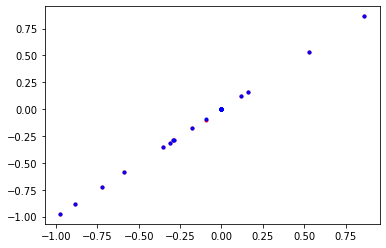

In [275]:
import matplotlib.pyplot as plt
%matplotlib inline
c_ex = []
c_nn = []
c_bp = []
for i, row in enumerate(J_interaction):
    for j, el in enumerate(row):
        if j < i:
            c_ex.append(tree.Corr_neigh[i][j])
            c_bp.append(BP_tree.Corr_neigh[i][j])
            c_nn.append(net.Corr_neigh[i][j])
plt.plot(c_ex, c_nn, ".r")
plt.plot(c_ex, c_bp, ".b")

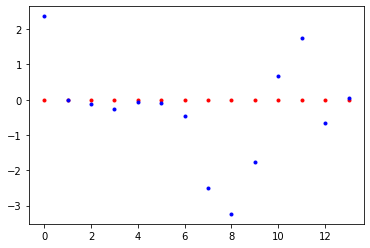

In [276]:
import matplotlib.pyplot as plt
%matplotlib inline
c_ex = []
c_nn = []
c_bp = []
for i, row in enumerate(tree.Corr_neigh):
    for j, el in enumerate(row):
        if j < i and el != 0:
            c_bp_err = 100. * abs(BP_tree.Corr_neigh[i][j] - tree.Corr_neigh[i][j])
            c_bp_err /= tree.Corr_neigh[i][j]
            c_nn_err = 100. * abs(net.Corr_neigh[i][j] - tree.Corr_neigh[i][j])
            c_nn_err /= tree.Corr_neigh[i][j]
            c_bp.append(c_bp_err)
            c_nn.append(c_nn_err)
plt.plot(c_bp, ".r")
plt.plot(c_nn, ".b")